In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
Dataset = pd.read_csv("Data\AirPassengers.csv")

In [3]:
Dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
Dataset['Month']= pd.to_datetime(Dataset['Month'])

In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
Dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df = Dataset.set_index("Month")

<AxesSubplot:xlabel='Month'>

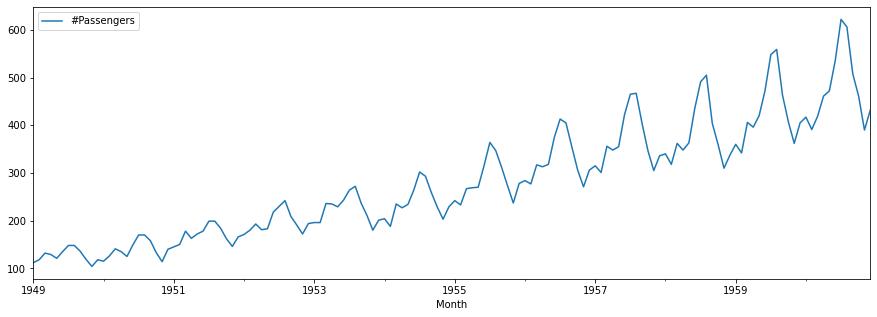

In [9]:
df.plot()

## Alternative code

<AxesSubplot:xlabel='Month'>

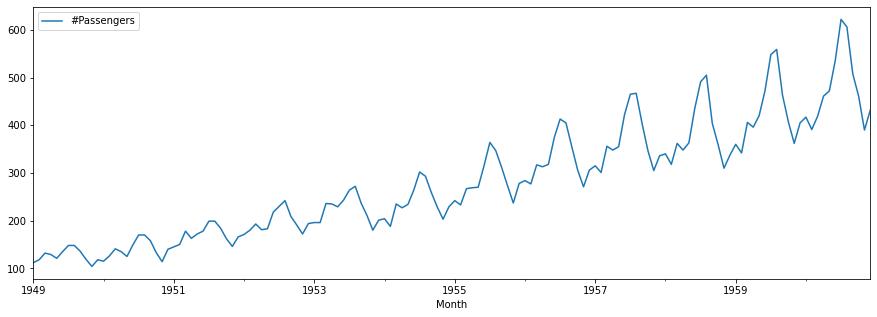

In [10]:
df_master = pd.read_csv("Data\AirPassengers.csv", parse_dates=["Month"], index_col="Month")
df_master.plot()

# Stationality

In [11]:
from statsmodels.tsa.stattools import adfuller


def adf_test(dataframe) -> None:
    adf, pvalue, _, _, critical_values, _ = adfuller(dataframe)
    stationary_value = pvalue <= 0.05
    test_critical_value = round(critical_values['5%'], 2)
    print(
        f"Is the time series stationary ? {stationary_value}\n"
        f"Test statistic value (adf) =  {round(adf,2)}\n" 
        f"P value = {round(pvalue,2)}\n" 
        f"test critical value ('5%') = {test_critical_value}")

adf_test(df)

Is the time series stationary ? False
Test statistic value (adf) =  0.82
P value = 0.99
test critical value ('5%') = -2.88


## Why 5% ?

# Make the time series stationary

In [12]:
df.diff().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


<AxesSubplot:xlabel='Month'>

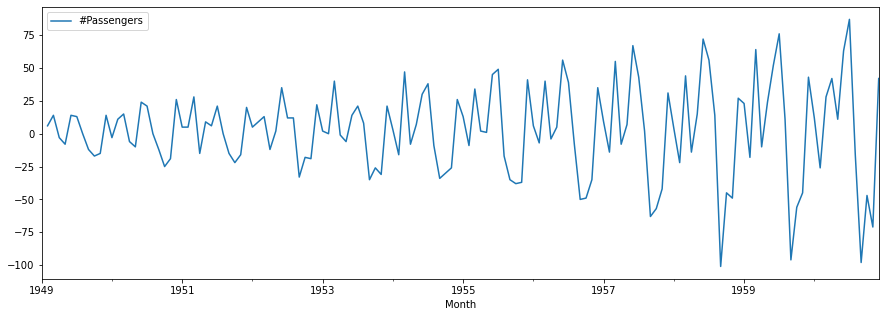

In [13]:
df.diff().plot()

Is the time series stationary ? False
Test statistic value (adf) =  -1.72
P value = 0.42
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

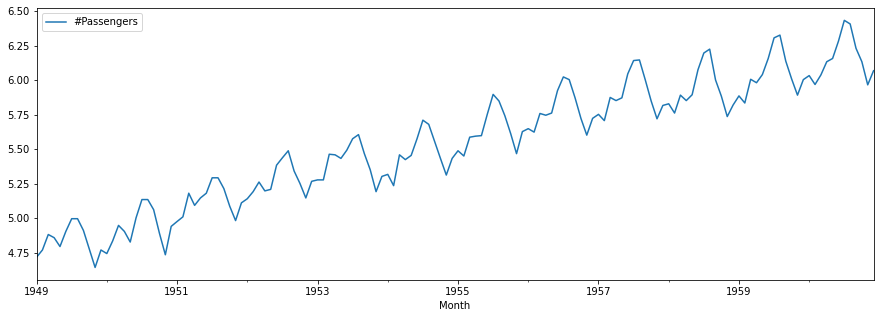

In [14]:
df_without_exponential_growth = np.log(df)
adf_test(df_without_exponential_growth)
df_without_exponential_growth.plot()

Is the time series stationary ? False
Test statistic value (adf) =  -2.72
P value = 0.07
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

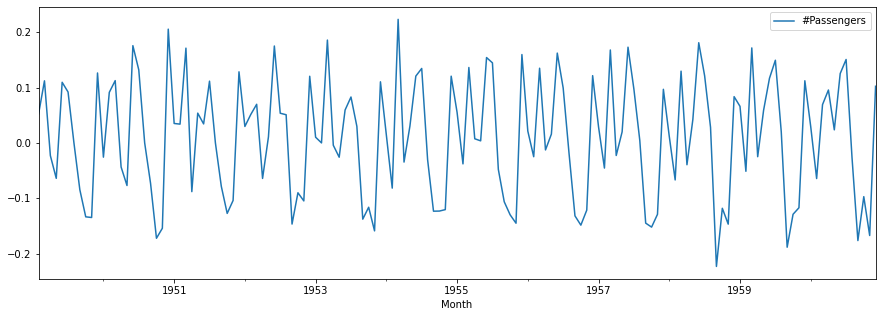

In [15]:
df_log_1_diff = df_without_exponential_growth.diff().dropna()
adf_test(df_log_1_diff)
df_log_1_diff.plot()

Is the time series stationary ? False
Test statistic value (adf) =  -2.83
P value = 0.05
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

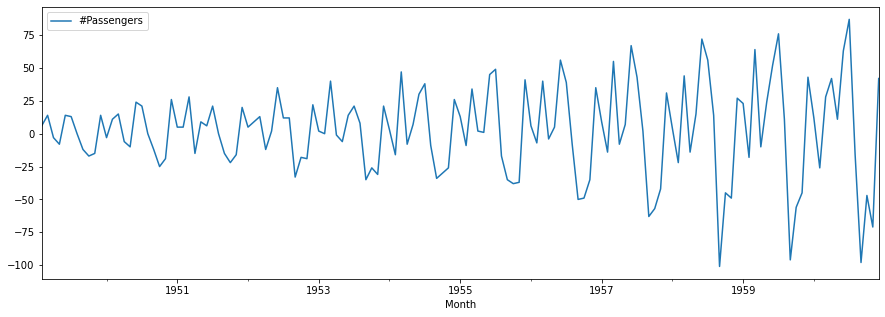

In [16]:
df_1_diff = df.diff().dropna()
adf_test(df_1_diff)
df_1_diff.plot()

Is the time series stationary ? True
Test statistic value (adf) =  -2.96
P value = 0.04
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

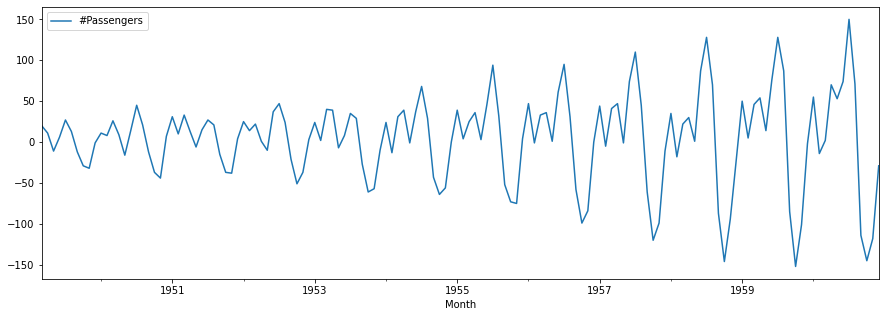

In [17]:
df_2_diff = df.diff(2).dropna()
adf_test(df_2_diff)
df_2_diff.plot()

# Autocorrelation

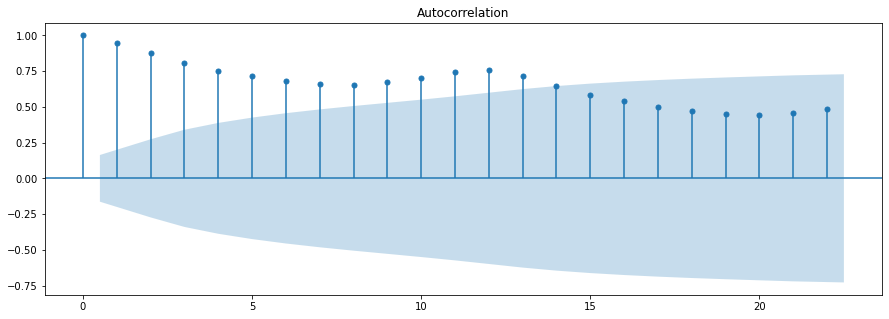

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(df)

<AxesSubplot:xlabel='Month'>

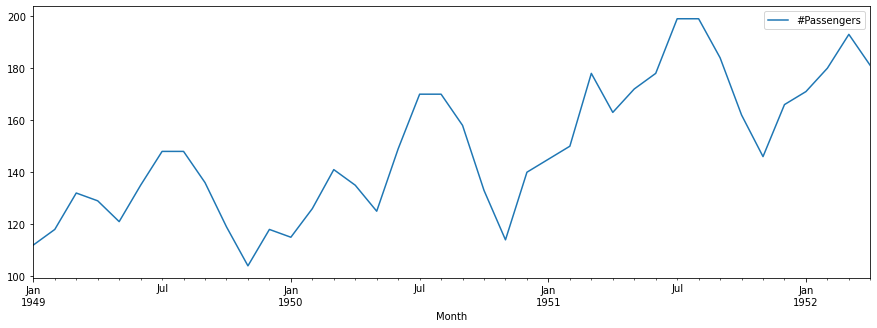

In [19]:
df.head(40).plot()

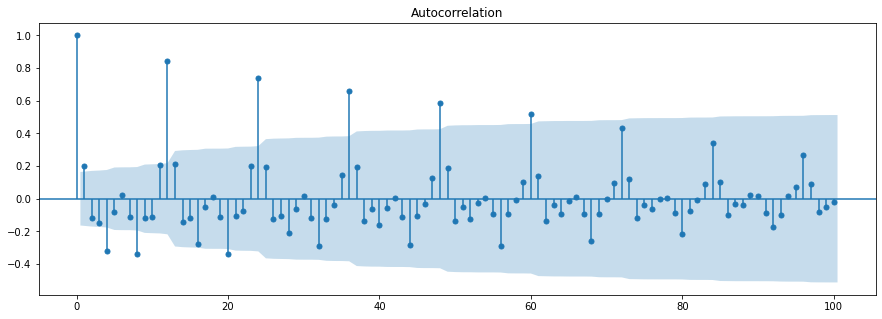

In [20]:
_ = plot_acf(df_log_1_diff, lags=100)

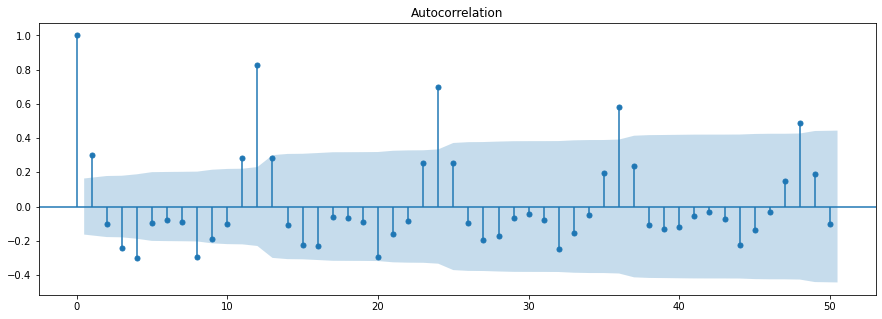

In [21]:
_ = plot_acf(df_1_diff, lags=50)

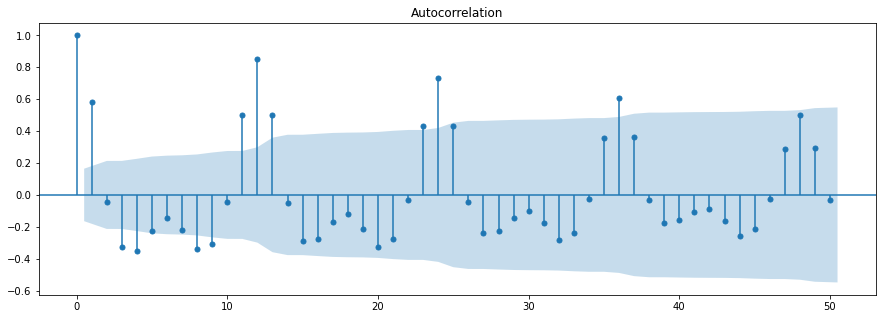

In [22]:
_ = plot_acf(df_2_diff, lags=50)

# Partial correlation

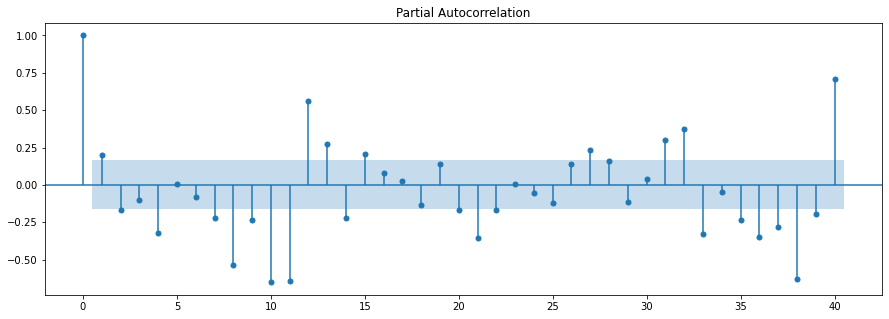

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_pacf(df_log_1_diff, lags=40)

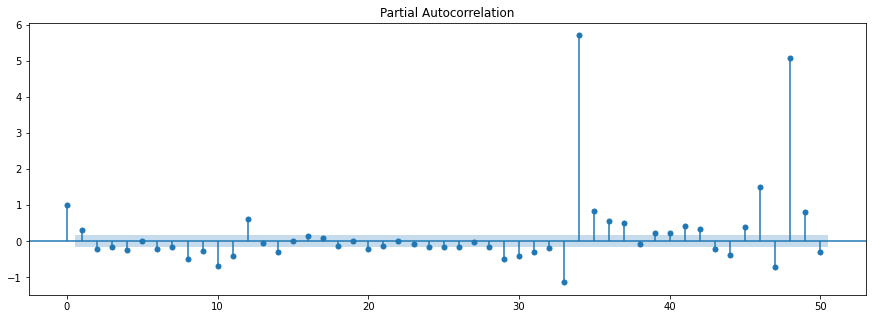

In [24]:
_ = plot_pacf(df_1_diff, lags=50)

# Stationary visulaization

In [25]:
stationary_data = df_2_diff

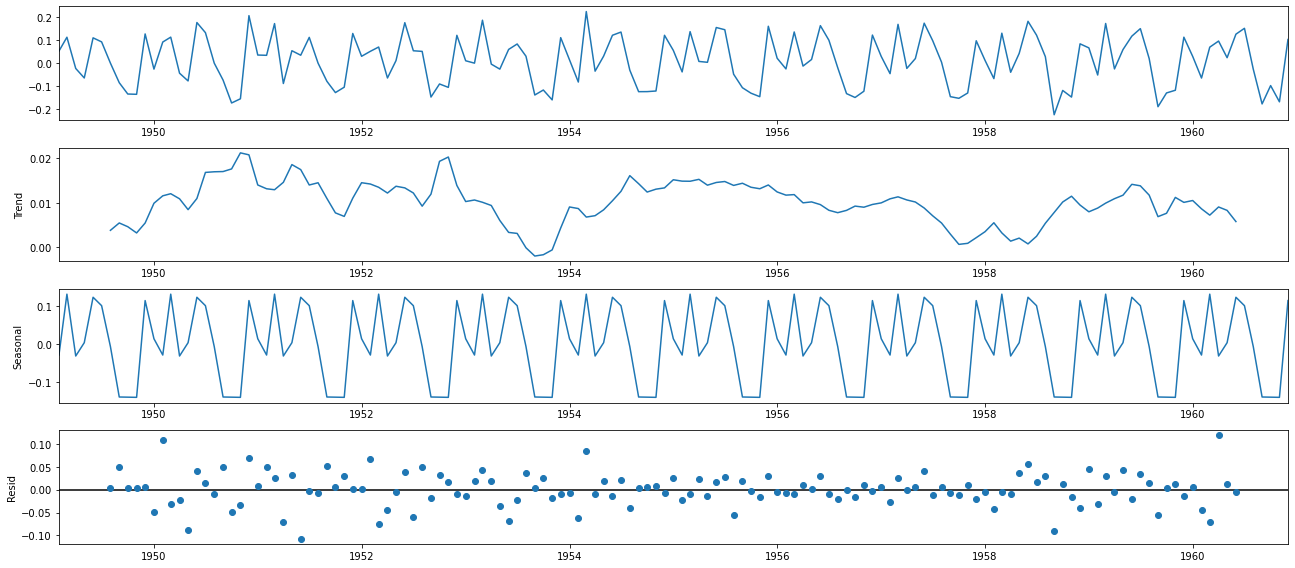

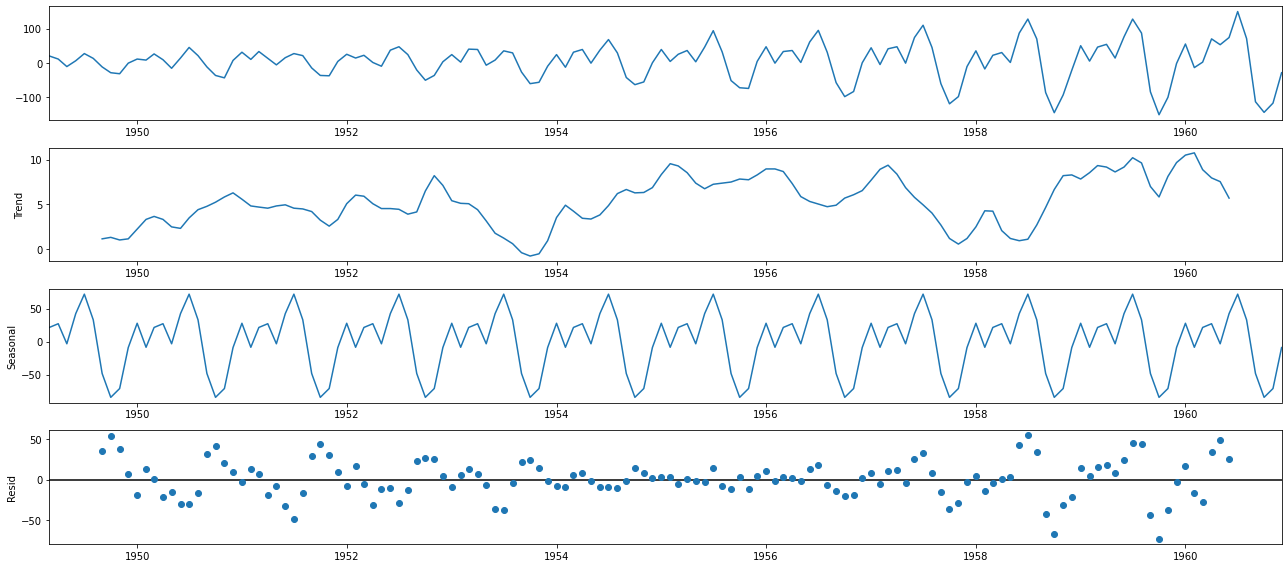

In [26]:
from pylab import rcParams
import statsmodels.api as sm

#Original dataset 
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_log_1_diff, model='additive')
fig = decomposition.plot()
plt.show()

# Dataset did stationary after applying 2nd order diff
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(stationary_data, model='additive')
fig = decomposition.plot()
plt.show()


P-value:  0.038629757676988195


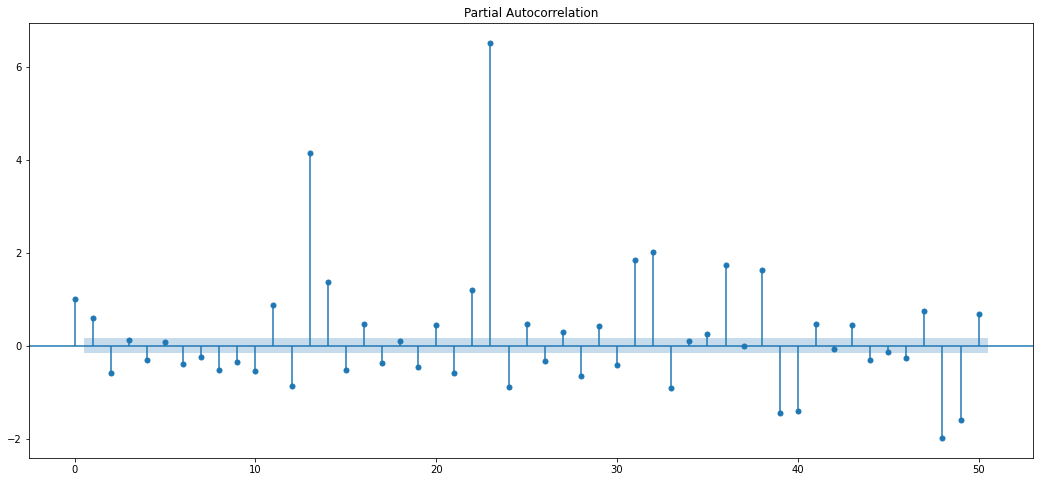

In [27]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

df_stationarityTest = adfuller(stationary_data, autolag='AIC')
print("P-value: ", df_stationarityTest[1])
pacf = plot_pacf(stationary_data, lags=50)

* We can see that the correlation from the graph upto 14 is decreased then increased so lag = 14

In [56]:
train_data = stationary_data[:len(stationary_data)-100]
test_data = stationary_data[len(stationary_data)-100:]

In [57]:
train_data.shape, test_data.shape

((42, 1), (100, 1))

In [58]:
ar_model = AutoReg(train_data, lags=14).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                   42
Model:                    AutoReg(14)   Log Likelihood                 -94.022
Method:               Conditional MLE   S.D. of innovations              6.952
Date:                Sat, 03 Jul 2021   AIC                              5.021
Time:                        12:37:22   BIC                              5.782
Sample:                    05-01-1950   HQIC                             5.254
                         - 08-01-1952                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           9.7543      4.160      2.345      0.019       1.602      17.907
#Passengers.L1      0.4371      0.184      2.373      0.018       0.076       0.798
#Passengers.L2     -0.6366      

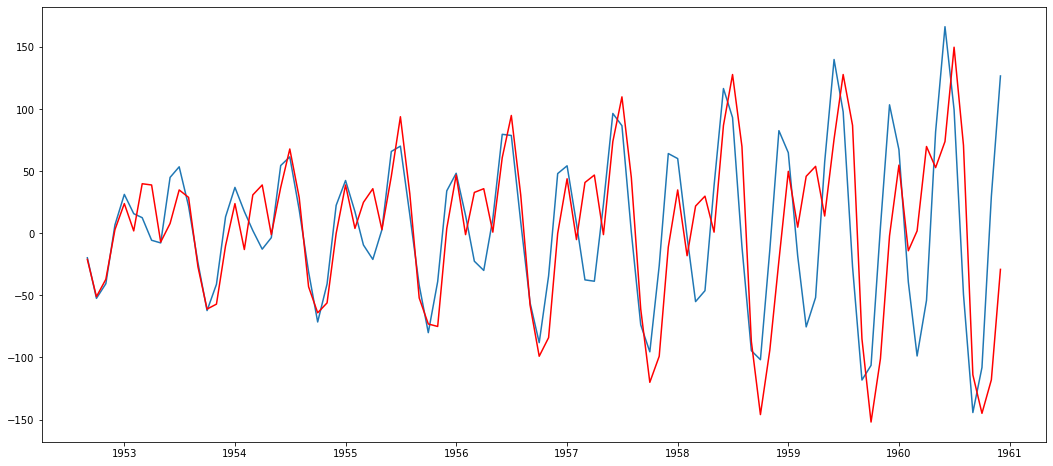

In [59]:
pred = ar_model.predict(start=len(train_data), end=(len(stationary_data)-1), dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

* Good prediction 

# ARIMA model

In [34]:
from statsmodels.tsa.arima.model import ARIMA

mod = sm.tsa.arima.ARIMA(stationary_data, order=(14, 0, 0))
res = mod.fit()
print(res.summary())

C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  142
Model:                ARIMA(14, 0, 0)   Log Likelihood                -553.983
Date:                Sat, 03 Jul 2021   AIC                           1139.966
Time:                        12:13:27   BIC              

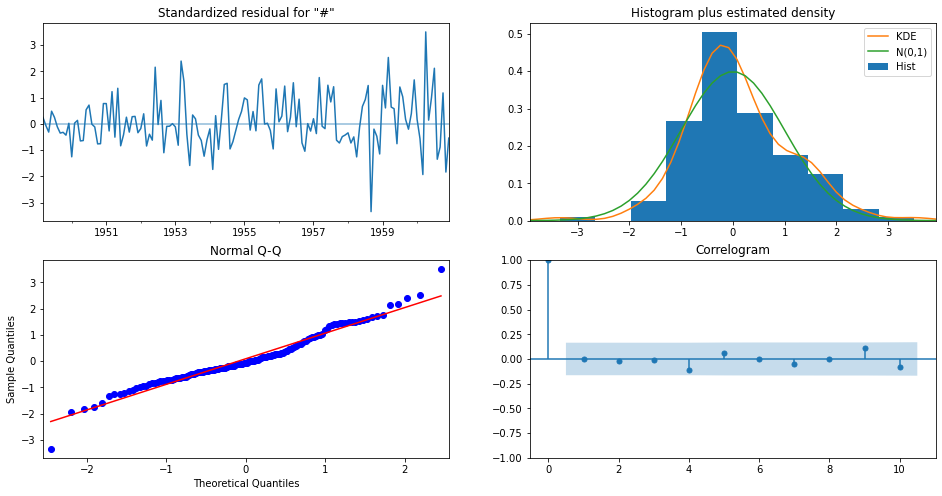

In [35]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()